# Technical Validation


Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is part of the EStreams publication and was used to provide one step towards the technical validation used in the paper:


* Basin delineation validation
* E-OBS coverage
* Validation of meteorological forcing




Note that this code enables not only the replicability of the current database but also the extrapolation to new catchment areas. 
* Additionally, the user should download and insert the original raw-data in the folder of the same name prior to run this code. 
* The original third-party data used were not made avaialble in this repository due to redistribution and storage-space reasons.  

## Requirements
**Python:**

* Python>=3.6
* Jupyter
* Geopandas=0.10.2
* Pandas
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* estreams_boundaries.shp
* lamah_boundaries.shp
* mghydro_boundaries_AT00009
* riv_pfaf_2_MERIT_Hydro_v07_Basins_v01.shp. Available at: https://www.reachhydro.org/home/params/merit-basins (Last access: 23 November 2023)
* europe.shp
* estreams_network.xlsx
* estreams_timeseries_p.csv
* Files: CAMELS_GB_hydromet_timeseries_{station}_19701001-20150930.csv. Available at: https://doi.org/10.5285/8344e4f3-d2ea-44f5-8afa-86d2987543a9 (Last access 08 December 2023)
* Files: CAMELS_CH_obs_based_{station}.csv. Available at: https://doi.org/10.5281/zenodo.10010004 (Last access 08 December 2023)

**Directory:**

* Clone the GitHub directory locally
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 

## References
* Yamazaki, D. et al. A high-accuracy map of global terrain elevations. Geophys Res Lett 44, 5844–5853 (2017).

* Yamazaki, D. et al. MERIT Hydro: A High-Resolution Global Hydrography Map Based on Latest Topography Dataset. Water Resour Res 55, 5053–5073 (2019).

* Coxon, G., Addor, N., Bloomfield, J. P., Freer, J., Fry, M., Hannaford, J., Howden, N. J. K., Lane, R., Lewis, M., Robinson, E. L., Wagener, T., and Woods, R.: CAMELS-GB: hydrometeorological time series and landscape attributes for 671 catchments in Great Britain, Earth Syst. Sci. Data, 12, 2459–2483, https://doi.org/10.5194/essd-12-2459-2020, 2020.

* Coxon, G.; Addor, N.; Bloomfield, J.P.; Freer, J.; Fry, M.; Hannaford, J.; Howden, N.J.K.; Lane, R.; Lewis, M.; Robinson, E.L.; Wagener, T.; Woods, R. (2020). Catchment attributes and hydro-meteorological timeseries for 671 catchments across Great Britain (CAMELS-GB). NERC Environmental Information Data Centre. https://doi.org/10.5285/8344e4f3-d2ea-44f5-8afa-86d2987543a9

* Höge, M., Kauzlaric, M., Siber, R., Schönenberger, U., Horton, P., Schwanbeck, J., Floriancic, M. G., Viviroli, D., Wilhelm, S., Sikorska-Senoner, A. E., Addor, N., Brunner, M., Pool, S., Zappa, M., and Fenicia, F.: CAMELS-CH: hydro-meteorological time series and landscape attributes for 331 catchments in hydrologic Switzerland, Earth Syst. Sci. Data Discuss. [preprint], https://doi.org/10.5194/essd-2023-127, in review, 2023.

* Höge, M., Kauzlaric, M., Siber, R., Schönenberger, U., Horton, P., Schwanbeck, J., Floriancic, M. G., Viviroli, D., Wilhelm, S., Sikorska-Senoner, A. E., Addor, N., Brunner, M., Pool, S., Zappa, M., & Fenicia, F. (2023). Catchment attributes and hydro-meteorological time series for large-sample studies across hydrologic Switzerland (CAMELS-CH) (0.7) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.10010004

## License
* MERIT: Dual-license - CC-BY-NC 4.0 and ODbL 1.0. http://hydro.iis.u-tokyo.ac.jp/~yamadai/MERIT_DEM/index.html (Last access: 27 November 2023)

# Import modules

In [11]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib as mpl
import glob
import tqdm as tqdm
from utils.hydrology import count_geometries_in_polygons

# Configurations

In [2]:
# Only editable variable:
PATH = r"/Users/thiagomedeirosdonascimento/Library/CloudStorage/OneDrive-Personal/PhD/Eawag/Papers/Paper1_Database/Paper/"

# Non-editable variables:
PATH_OUTPUT = "results/"
os.chdir(PATH)

# Basin delineation validation
## Import data
### Catchment boundaries
* EStreams
* Lamah
* mghydro delineation

In [3]:
catchment_boundaries = gpd.read_file('data/shapefiles/estreams_catchments.shp')
catchment_boundaries

id area_km2  outlet_lat  outlet_lng                   name  \
0      DE01821       83   52.289000    9.085000                4723104   
1      DE01823      179   52.095000    9.377000                4572113   
2      DE01824       74   53.336000    8.926000                4948105   
3      DE01825       56   53.555000    9.071000                5986104   
4      DE01826      193   52.405000    9.986000                4854112   
...        ...      ...         ...         ...                    ...   
15180  NL00013    28900   51.827000    5.566000             Megen dorp   
15181  NL00015      148   51.812000    4.566000            Puttershoek   
15182  NL00016     9500   51.350000    4.251000  Schaar van Ouden Doel   
15183  NL00017    21300   50.830000    5.697000      Sint Pieter noord   
15184  NL00014     3229   52.342353    6.103294                   Olst   

      area_offic  area_calc     Code basin_id label_area  \
0           86.5     83.018  DE01821  DE01821       None   
1            181    178.891  DE01823  DE01823       None   
2             80     73.886  DE01824  DE01824       None   
3             55     56.034  DE01825  DE01825       None   
4            180    192.971  DE01826  DE01826       None   
...          ...        ...      ...      ...        ...   
15180       None  28900.000  NL00013  NL00013          4   
15181       None    148.000  NL00015  NL00015        888   
15182       None   9500.000  NL00016  NL00016          4   
15183       None  21300.000  NL00017  NL00017          4   
15184       None   3229.000  NL00014  NL00014          6   

                               layer  \
0               catchments_DE_NI_v04   
1               catchments_DE_NI_v04   
2               catchments_DE_NI_v04   
3               catchments_DE_NI_v04   
4               catchments_DE_NI_v04   
...                              ...   
15180  Catchment_Boundaries_NL_Merge   
15181  Catchment_Boundaries_NL_Merge   
15182  Catchment_Boundaries_NL_Merge   
15183  Catchment_Boundaries_NL_Merge   
15184  Catchment_Boundaries_NL_Merge   

                                                    path  \
0      C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
1      C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
2      C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
3      C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
4      C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
...                                                  ...   
15180  C:\Users\nascimth\Documents\Thiago\Eawag\Pytho...   
15181  C:\Users\nascimth\Documents\Thiago\Eawag\Pytho...   
15182  C:\Users\nascimth\Documents\Thiago\Eawag\Pytho...   
15183  C:\Users\nascimth\Documents\Thiago\Eawag\Pytho...   
15184  C:\Users\nascimth\Documents\Thiago\Eawag\Pytho...   

                                                geometry  
0      POLYGON Z ((9.08958 52.29875 0.00000, 9.09208 ...  
1      POLYGON Z ((9.41125 52.09458 0.00000, 9.41125 ...  
2      POLYGON Z ((8.92458 53.38041 0.00000, 8.92791 ...  
3      POLYGON Z ((9.04041 53.60291 0.00000, 9.04291 ...  
4      POLYGON Z ((9.91708 52.35708 0.00000, 9.91624 ...  
...                                                  ...  
15180  POLYGON Z ((4.45041 49.91875 0.00000, 4.45041 ...  
15181  POLYGON Z ((4.49041 51.82958 0.00000, 4.49041 ...  
15182  POLYGON Z ((4.18958 51.29875 0.00000, 4.18958 ...  
15183  POLYGON Z ((4.45041 49.91875 0.00000, 4.45041 ...  
15184  POLYGON Z ((6.60972 52.15431 0.00000, 6.60946 ...  

[15185 rows x 13 columns]

In [4]:
catchment_boundaries_mghydro = gpd.read_file('data/shapefiles/lamah_boundaries.shp')
catchment_boundaries_mghydro

id area_km2  outlet_lat  outlet_lng    name         area_offic  \
0     AT00001    4,670      47.274       9.535  200014             4647.9   
1     AT00002      100      47.080       9.914  200048                102   
2     AT00003      534      47.133       9.848  231662              535.2   
3     AT00004       64      47.129      10.062  200592  66.59999999999999   
4     AT00005       71      47.151       9.803  200097               72.2   
...       ...      ...         ...         ...     ...                ...   
1563  GB00005       24      50.650      -1.250  101005              24.31   
1564  GB00004       31      50.690      -1.290  101002              30.61   
1565  GB00003      160      58.480      -3.270    1001             158.18   
1566  GB00002      532      57.360      -2.090   10003             532.29   
1567  GB00001        1      57.530      -1.830   10002             325.72   

        layer                                               path  \
0     AT00001  C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
1     AT00002  C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
2     AT00003  C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
3     AT00004  C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
4     AT00005  C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
...       ...                                                ...   
1563  GB00005  C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
1564  GB00004  C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
1565  GB00003  C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
1566  GB00002  C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
1567  GB00001  C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   

                                               geometry  
0     POLYGON ((9.49708 47.21208, 9.49708 47.21291, ...  
1     POLYGON ((9.93208 47.11625, 9.93708 47.11625, ...  
2     POLYGON ((9.91958 47.11375, 9.92041 47.11375, ...  
3     POLYGON ((10.17541 47.15791, 10.18124 47.15791...  
4     POLYGON ((9.80041 47.15208, 9.80208 47.15208, ...  
...                                                 ...  
1563  POLYGON ((-1.25458 50.65458, -1.25291 50.65458...  
1564  POLYGON ((-1.29125 50.69041, -1.28958 50.69041...  
1565  POLYGON ((-3.28958 58.50291, -3.28958 58.50291...  
1566  POLYGON ((-2.10625 57.37791, -2.10625 57.37708...  
1567  POLYGON ((-1.83208 57.54291, -1.82958 57.54291...  

[1568 rows x 9 columns]

In [5]:
AT00009_mghydro = gpd.read_file('data/shapefiles/mghydro_boundaries_AT00009.shp')
AT00009_mghydro

gid                                           geometry
0    0  POLYGON ((9.59208 47.20875, 9.59125 47.21292, ...

## Merit-Hydro river network

In [6]:
river_net_EU_MERIT = gpd.read_file('data/shapefiles/riv_pfaf_2_MERIT_Hydro_v07_Basins_v01.shp')
river_net_EU_MERIT

COMID   lengthkm  lengthdir  sinuosity     slope      uparea  \
0       21000001   9.079822   5.620153   1.615583  0.000220  382.604819   
1       21000002   2.842653   1.826319   1.556494  0.001124  325.410126   
2       21000003  20.918003  14.119143   1.481535  0.001484  415.960268   
3       21000004  12.775680   6.218682   2.054403  0.000609  275.794567   
4       21000005   3.535374   2.233011   1.583232  0.001892  171.981367   
...          ...        ...        ...        ...       ...         ...   
393459  29123032  30.204422  21.486454   1.405743  0.005751   82.869595   
393460  29123033  10.813198   8.296287   1.303378  0.014205   65.406667   
393461  29123034  16.082080   9.903307   1.623910  0.011262   67.604187   
393462  29123035   1.327687   0.656550   2.022219  0.000000   36.423539   
393463  29123036  12.188121   7.319589   1.665137  0.001069   56.175812   

        order  strmDrop_t  slope_taud  NextDownID  maxup       up1       up2  \
0           2         2.0    0.000220    21000054      2  21000002  21000011   
1           2         3.2    0.001124    21000001      2  21000004  21000013   
2           2        31.1    0.001484    21000055      2  21000006  21000009   
3           2         7.8    0.000609    21000002      2  21000005  21000016   
4           2         6.7    0.001892    21000004      2  21000014  21000015   
...       ...         ...         ...         ...    ...       ...       ...   
393459      1       173.4    0.005751           0      0         0         0   
393460      1       153.2    0.014205    29122956      0         0         0   
393461      1       180.7    0.011262           0      0         0         0   
393462      1         0.0    0.000000           0      0         0         0   
393463      1        13.0    0.001069           0      0         0         0   

        up3  up4                                           geometry  
0         0    0  LINESTRING (5.88917 47.94917, 5.88833 47.94917...  
1         0    0  LINESTRING (5.90667 47.99833, 5.90750 47.99833...  
2         0    0  LINESTRING (6.04750 47.95083, 6.04833 47.95083...  
3         0    0  LINESTRING (5.91667 48.01333, 5.91750 48.01333...  
4         0    0  LINESTRING (5.99083 48.03917, 5.99167 48.03833...  
...     ...  ...                                                ...  
393459    0    0  LINESTRING (43.49000 12.80583, 43.49083 12.805...  
393460    0    0  LINESTRING (44.46250 12.82500, 44.46167 12.825...  
393461    0    0  LINESTRING (44.59833 12.81833, 44.59750 12.819...  
393462    0    0  LINESTRING (45.07917 12.90917, 45.07833 12.908...  
393463    0    0  LINESTRING (45.06167 12.87167, 45.06083 12.871...  

[393464 rows x 16 columns]

In [7]:
# Now we dissolve the shapefile
river_net_EU_MERIT_dissolved = river_net_EU_MERIT.dissolve()

## Catchment areas from mghydro for Austria


In [8]:
# The final database presents the official source area and not the delineation from mghydro. 
# That is the reason why we need to check the data for those three countries from this separated file:

catchments_comparison = pd.read_excel("data/lamah_boundaries.xlsx")
catchments_comparison.set_index("id", inplace = True)
catchments_comparison.drop("path", axis = 1, inplace = True)

catchments_comparison.columns = ["area_mghydro", "lat", "lon", "name", "area_official", "code", "per_diff"]
catchments_comparison.index.name = "new_code"

catchments_comparison.area_official.replace(0, np.nan, inplace = True)

catchments_comparison["per_diff_abs"] = abs(catchments_comparison["per_diff"])

catchments_comparison

area_mghydro     lat     lon    name  area_official     code  \
new_code                                                                 
AT00001           4670  47.274   9.535  200014         4647.9  AT00001   
AT00002            100  47.080   9.914  200048          102.0  AT00002   
AT00003            534  47.133   9.848  231662          535.2  AT00003   
AT00004             64  47.129  10.062  200592           66.6  AT00004   
AT00005             71  47.151   9.803  200097           72.2  AT00005   
...                ...     ...     ...     ...            ...      ...   
AT00595            380  46.885  14.866  213082          380.2  AT00595   
AT00596             56  46.841  14.835  213314           55.9  AT00596   
AT00597            713  46.784  14.836  213371          715.6  AT00597   
AT00598             60  46.700  14.871  213819           61.1  AT00598   
AT00599            954  46.663  14.945  213090          954.5  AT00599   

          per_diff  per_diff_abs  
new_code                          
AT00001   0.475484      0.475484  
AT00002  -1.960784      1.960784  
AT00003  -0.224215      0.224215  
AT00004  -3.903904      3.903904  
AT00005  -1.662050      1.662050  
...            ...           ...  
AT00595  -0.052604      0.052604  
AT00596   0.178891      0.178891  
AT00597  -0.363331      0.363331  
AT00598  -1.800327      1.800327  
AT00599  -0.052383      0.052383  

[599 rows x 8 columns]

In [9]:
above10 = catchments_comparison[catchments_comparison.per_diff_abs > 10][catchments_comparison.area_official > 0]
above10

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_25758/2918239238.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  above10 = catchments_comparison[catchments_comparison.per_diff_abs > 10][catchments_comparison.area_official > 0]


area_mghydro     lat     lon    name  area_official     code  \
new_code                                                                 
AT00009           4680  47.260   9.579  200147         1281.0  AT00009   
AT00011           1300  47.284   9.594  200527           25.2  AT00011   
AT00012           1310  47.306   9.579  200162           39.1  AT00012   
AT00018              3  47.435   9.696  200220           77.5  AT00018   
AT00023            235  47.371   9.896  200493           14.1  AT00023   
AT00025             16  47.472  10.022  200584           13.7  AT00025   
AT00030              6  47.536   9.745  200345            6.8  AT00030   
AT00040            263  47.390  11.264  201095          203.6  AT00040   
AT00044           2140  46.937  10.490  201160          107.8  AT00044   
AT00068             24  47.036  11.479  201640           58.3  AT00068   
AT00092           8940  47.452  12.089  202697            9.7  AT00092   
AT00100             89  47.592  12.119  202259            6.2  AT00100   
AT00109              2  47.621  12.387  202549           47.9  AT00109   
AT00119            697  47.286  12.532  203984           11.4  AT00119   
AT00121              5  47.273  12.759  203109           88.6  AT00121   
AT00122              4  47.169  12.812  203133           60.7  AT00122   
AT00131             32  47.556  13.334  203927           26.9  AT00131   
AT00138             33  47.773  13.003  203422           26.5  AT00138   
AT00144            756  47.585  12.698  203505          107.4  AT00144   
AT00154             18  48.053  13.353  206052           13.1  AT00154   
AT00156             26  47.982  13.250  203638           40.6  AT00156   
AT00159            220  48.131  13.146  206078          188.8  AT00159   
AT00160            220  48.132  13.146  206086           31.2  AT00160   
AT00162              3  48.133  13.426  204685           24.0  AT00162   
AT00200             48  47.635  13.768  210542           54.5  AT00200   
AT00213             31  47.820  13.244  203661           34.9  AT00213   
AT00243            173  47.381  13.429  203711          134.5  AT00243   
AT00264             19  47.692  14.113  205773           15.6  AT00264   
AT00272            430  47.783  14.197  206524           15.0  AT00272   
AT00277            812  47.917  14.213  205583           20.9  AT00277   
AT00288              5  48.437  14.781  206003           36.9  AT00288   
AT00292            142  47.860  15.031  209551          117.9  AT00292   
AT00314             57  48.118  15.332  207829           37.6  AT00314   
AT00324             22  47.858  15.577  209536           53.9  AT00324   
AT00360            880  48.116  16.364  209346           20.0  AT00360   
AT00361           1140  48.140  16.473  208157         1028.9  AT00361   
AT00362           1140  48.141  16.476  208199          112.8  AT00362   
AT00373            560  48.188  16.896  209262          497.8  AT00373   
AT00379              7  48.893  15.035  214338          102.5  AT00379   
AT00388            528  48.731  16.340  208652          139.9  AT00388   
AT00402            390  47.720  16.122  208785          716.6  AT00402   
AT00408            510  47.803  16.273  208884         1220.6  AT00408   
AT00409           1480  47.857  16.324  209288         1242.2  AT00409   
AT00410            193  47.820  16.221  208918           92.5  AT00410   
AT00430             20  47.598  16.603  215020           16.7  AT00430   
AT00461            147  47.130  16.233  210484           94.4  AT00461   
AT00475            910  47.077  13.814  203810           84.9  AT00475   
AT00495           6700  47.201  15.341  211649          117.8  AT00495   
AT00508            156  46.827  15.262  211664           85.3  AT00508   
AT00509             69  46.828  15.257  211813           50.5  AT00509   
AT00541             17  46.916  13.313  213447           12.6  AT00541   
AT00555            269  46.745  14.044  213462           38.5  AT00555   
AT00556       

In [10]:
print("Catchemnts with differences above 10%: ", int(len(above10)))

Catchemnts with differences above 10%:  60


In [11]:
above10_above100area = catchments_comparison[catchments_comparison.per_diff_abs > 10][catchments_comparison.area_official > 100]
above10_above100area

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_25758/780520303.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  above10_above100area = catchments_comparison[catchments_comparison.per_diff_abs > 10][catchments_comparison.area_official > 100]


area_mghydro     lat     lon    name  area_official     code  \
new_code                                                                 
AT00009           4680  47.260   9.579  200147         1281.0  AT00009   
AT00040            263  47.390  11.264  201095          203.6  AT00040   
AT00044           2140  46.937  10.490  201160          107.8  AT00044   
AT00144            756  47.585  12.698  203505          107.4  AT00144   
AT00159            220  48.131  13.146  206078          188.8  AT00159   
AT00243            173  47.381  13.429  203711          134.5  AT00243   
AT00292            142  47.860  15.031  209551          117.9  AT00292   
AT00361           1140  48.140  16.473  208157         1028.9  AT00361   
AT00362           1140  48.141  16.476  208199          112.8  AT00362   
AT00373            560  48.188  16.896  209262          497.8  AT00373   
AT00379              7  48.893  15.035  214338          102.5  AT00379   
AT00388            528  48.731  16.340  208652          139.9  AT00388   
AT00402            390  47.720  16.122  208785          716.6  AT00402   
AT00408            510  47.803  16.273  208884         1220.6  AT00408   
AT00409           1480  47.857  16.324  209288         1242.2  AT00409   
AT00495           6700  47.201  15.341  211649          117.8  AT00495   
AT00557            528  46.636  13.882  212597          169.7  AT00557   
AT00572            201  46.849  14.200  212886          431.8  AT00572   
AT00573            169  46.974  14.280  213306          144.6  AT00573   
AT00576            832  46.860  14.450  213397         1061.0  AT00576   
AT00577           1010  46.761  14.476  213157         1243.1  AT00577   

             per_diff  per_diff_abs  
new_code                             
AT00009    265.339578    265.339578  
AT00040     29.174853     29.174853  
AT00044   1885.157699   1885.157699  
AT00144    603.910615    603.910615  
AT00159     16.525424     16.525424  
AT00243     28.624535     28.624535  
AT00292     20.441052     20.441052  
AT00361     10.797940     10.797940  
AT00362    910.638298    910.638298  
AT00373     12.494978     12.494978  
AT00379    -93.170732     93.170732  
AT00388    277.412437    277.412437  
AT00402    -45.576333     45.576333  
AT00408    -58.217270     58.217270  
AT00409     19.143455     19.143455  
AT00495   5587.606112   5587.606112  
AT00557    211.137301    211.137301  
AT00572    -53.450672     53.450672  
AT00573     16.874136     16.874136  
AT00576    -21.583412     21.583412  
AT00577    -18.751508     18.751508

In [12]:
print("Catchemnts with differences above 10% and areas above 100km2: ", int(len(above10_above100area)))

Catchemnts with differences above 10% and areas above 100km2:  21


In [13]:
catchments_comparison.loc[:, ["area_official", "area_mghydro"]].corr()

area_official  area_mghydro
area_official       1.000000      0.999016
area_mghydro        0.999016      1.000000

## Plots

In [14]:
# Create a GeoDataFrame with a geometry column containing Point geometries
geometry = [Point(xy) for xy in zip(catchments_comparison['lon'], catchments_comparison['lat'])]
geo_df = gpd.GeoDataFrame(catchments_comparison, geometry=geometry, crs='EPSG:4326')  # Assuming WGS84 CRS

### Plot 1, Not logarithmic

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_25758/3551569527.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axin.set_yticklabels(axin.get_yticks().astype(int), rotation=360)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


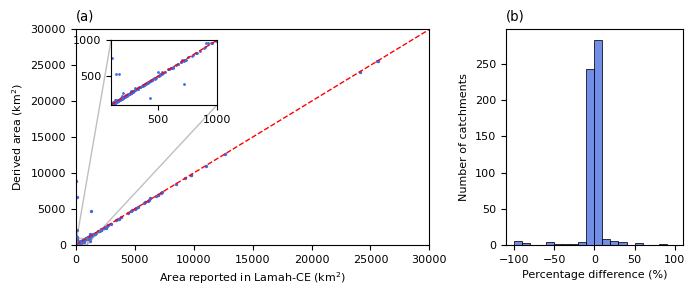

In [16]:
plt.rcParams.update({'font.size': 8})  # Change the 12 to your desired font size

fig, axs = plt.subplots(1, 2, figsize=(7, 3),  gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(catchments_comparison["area_official"],catchments_comparison["area_mghydro"], s = 2, color='royalblue')

axin = axs[0].inset_axes([0.1, 0.65, 0.3, 0.3]) 
axin.scatter(catchments_comparison["area_official"],catchments_comparison["area_mghydro"], s=1, color='royalblue')

axs[0].set_xlim(0, 30000)
axs[0].set_ylim(0, 30000)
axs[0].set_ylabel("Derived area ($\mathrm{km}^2$)")
axs[0].set_xlabel("Area reported in Lamah-CE ($\mathrm{km}^2$)")

axin.set_xlim(100, 1000)
axin.set_ylim(100, 1000)

axs[0].axline((0, 0), slope=1, color='red', linestyle='--', linewidth = 1)
axin.axline((0, 0), slope=1, color='red', linestyle='--', linewidth = 1)

axin.set_yticklabels(axin.get_yticks().astype(int), rotation=360)


axs[0].indicate_inset_zoom(axin)


# Plotting the histogram
# Create a histogram with custom bin edges
bin_edges = [ -100, -90,-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
sns.histplot(catchments_comparison.per_diff, bins=bin_edges, kde=False, color='royalblue', ax=axs[1])
axs[1].set_ylabel("Number of catchments")
axs[1].set_xlabel("Percentage difference (%)")

# Title and labels
axs[0].set_title('(a)', loc="left")
axs[1].set_title('(b)', loc="left")

# Legend for the second subplot
axs[1].legend(frameon=False)

fig.tight_layout()

fig.savefig('results/areas_comparison.png', dpi=300,  bbox_inches='tight')

### Plot 1, Logarithmic scale

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


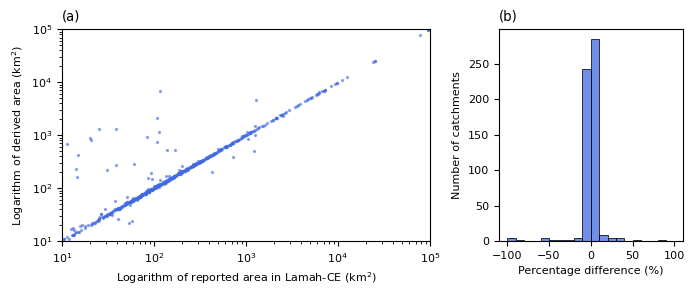

In [17]:
plt.rcParams.update({'font.size': 8})  # Change the 12 to your desired font size

fig, axs = plt.subplots(1, 2, figsize=(7, 3),  gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(catchments_comparison["area_official"],catchments_comparison["area_mghydro"], s = 2, color='royalblue', 
              alpha = 0.5)

axs[0].set_xlim(10, 100000)
axs[0].set_ylim(10, 100000)
axs[0].set_ylabel("Logarithm of derived area ($\mathrm{km}^2$)")
axs[0].set_xlabel("Logarithm of reported area in Lamah-CE ($\mathrm{km}^2$)")

axs[0].set_xscale('log')  # Set x-axis to log scale
axs[0].set_yscale('log')  # Set y-axis to log scale

# Plotting the histogram
# Create a histogram with custom bin edges
bin_edges = [ -100, -90,-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
sns.histplot(catchments_comparison.per_diff, bins=bin_edges, kde=False, color='royalblue', ax=axs[1])
axs[1].set_ylabel("Number of catchments")
axs[1].set_xlabel("Percentage difference (%)")

# Title and labels
axs[0].set_title('(a)', loc="left")
axs[1].set_title('(b)', loc="left")

# Legend for the second subplot
axs[1].legend(frameon=False)

fig.tight_layout()

fig.savefig('results/areas_comparison_log.png', dpi=300,  bbox_inches='tight')

### Plot 2

In [18]:
catchment1 = catchment_boundaries[catchment_boundaries.id == "AT00009"]
catchment1

id           area_km2  outlet_lat  outlet_lng      name  \
14542  AT00009  1281.796010374236       47.26       9.579  Gisingen   

      area_offic  area_calc     Code basin_id label_area layer  path  \
14542       1281   1281.796  AT00009  AT00009          0  None  None   

                                                geometry  
14542  POLYGON Z ((10.11095 46.89437 0.00000, 10.1122...

In [19]:
catchment1_mghydro = catchment_boundaries_mghydro[catchment_boundaries_mghydro.id == "AT00009"]
catchment1_mghydro

id area_km2  outlet_lat  outlet_lng    name area_offic    layer  \
8  AT00009    4,680       47.26       9.579  200147       1281  AT00009   

                                                path  \
8  C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   

                                            geometry  
8  POLYGON ((9.49708 47.21208, 9.49708 47.21291, ...

In [20]:
gauge1 = geo_df[geo_df.index == "AT00009"]
gauge1

area_mghydro    lat    lon    name  area_official     code  \
new_code                                                               
AT00009           4680  47.26  9.579  200147         1281.0  AT00009   

            per_diff  per_diff_abs                  geometry  
new_code                                                      
AT00009   265.339578    265.339578  POINT (9.57900 47.26000)

In [21]:
# Perform the spatial clip of the river network (faster processing for plot)

# We also set a buffer to have the network beyond the boundaries
buffer_distance = 0.01  # Adjust the buffer distance as needed
buffered_1 = catchment1.geometry.buffer(buffer_distance)
buffered_2 = catchment1_mghydro.geometry.buffer(buffer_distance)

rivers_1 = gpd.clip(river_net_EU_MERIT_dissolved, buffered_1)

rivers_2 = gpd.clip(river_net_EU_MERIT_dissolved, buffered_2)

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_25758/1311748261.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_1 = catchment1.geometry.buffer(buffer_distance)
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_25758/1311748261.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_2 = catchment1_mghydro.geometry.buffer(buffer_distance)


/Users/thiagomedeirosdonascimento/anaconda3/envs/eawag/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/thiagomedeirosdonascimento/anaconda3/envs/eawag/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/thiagomedeirosdonascimento/anaconda3/envs/eawag/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


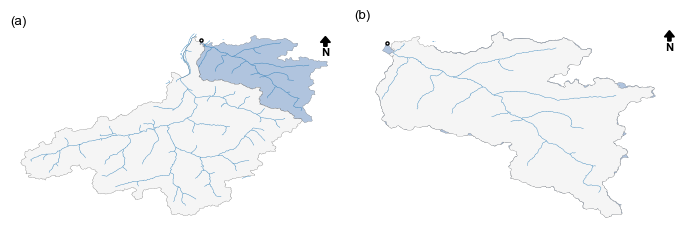

In [22]:
# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'normal'  # Change label font weight (e.g., 'bold', 'normal')

fig, axs = plt.subplots(1, 2, figsize=(7, 3),  gridspec_kw={'width_ratios': [1, 1]})

###1:
# Set the background color to white
axs[0].set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
catchment1.plot(ax=axs[0], facecolor='lightsteelblue', edgecolor='black', linewidth=0.1)
catchment1_mghydro.plot(ax=axs[0], facecolor='whitesmoke', edgecolor='black', linewidth=0.1)


rivers_1.plot(ax=axs[0], linewidth=0.25)
rivers_2.plot(ax=axs[0], linewidth=0.25)

gauge1.plot(ax=axs[0], marker='o', color='white', markersize=5, edgecolor='black')

minx, miny, maxx, maxy = 8.6, 46.3, 10.3, 47.3
axs[0].set_xlim(minx, maxx) 
axs[0].set_ylim(miny, maxy)  

axs[0].set_axis_off()  # Turn off both x-axis and y-axis

axs[0].set_aspect('equal')  # Adjust aspect ratio as needed
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)

# Title and (a) label for the first subplot
axs[0].set_title('(a)', loc="left")


# Set the background color to white
axs[1].set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
catchment1.plot(ax=axs[1], facecolor='lightsteelblue', edgecolor='black', linewidth=0.1)
AT00009_mghydro.plot(ax=axs[1], facecolor='whitesmoke', edgecolor='black', linewidth=0.1)


rivers_1.plot(ax=axs[1], linewidth=0.25)

gauge1.plot(ax=axs[1], marker='o', color='white', markersize=5, edgecolor='black')

minx, miny, maxx, maxy = 9.5, 46.8, 10.3, 47.3
axs[1].set_xlim(minx, maxx) 
axs[1].set_ylim(miny, maxy)  


axs[1].set_axis_off()  # Turn off both x-axis and y-axis

axs[1].set_aspect('equal')  # Adjust aspect ratio as needed
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)

# Title and (a) label for the first subplot
axs[1].set_title('(b)', loc="left")

# Add a north arrow to the first subplot (axs[0])
arrow_length = 0.02
arrow_style = dict(facecolor='black', edgecolor='black', width=0.01, head_width=0.03, head_length=0.03)

# Add the arrow to the first subplot
axs[0].arrow(0.95, 0.95 - arrow_length, 0, arrow_length, **arrow_style, transform=axs[0].transAxes)

# Repeat the same for the second subplot
axs[1].arrow(0.95, 0.95 - arrow_length, 0, arrow_length, **arrow_style, transform=axs[1].transAxes)

# Add 'N' text to the first subplot
axs[0].text(0.95, 0.95 - arrow_length - 0.03, 'N', ha='center', va='center', fontsize=8, fontweight='bold', color='black', transform=axs[0].transAxes)
axs[1].text(0.95, 0.95 - arrow_length - 0.03, 'N', ha='center', va='center', fontsize=8, fontweight='bold', color='black', transform=axs[1].transAxes)

fig.patch.set_facecolor('none')


#plt.rcParams.update({'font.size': 8})  # Change 18 to your desired font size

fig.tight_layout()

# Save or display the plot
#plt.show()
fig.savefig('results/fig2_comparison_areas.png', dpi=300,  bbox_inches='tight')

# E-OBS coverage

## Import data
### Catchment boundaries

In [23]:
catchment_boundaries = gpd.read_file('data/shapefiles/estreams_catchments.shp')
catchment_boundaries

id area_km2  outlet_lat  outlet_lng                   name  \
0      DE01821       83   52.289000    9.085000                4723104   
1      DE01823      179   52.095000    9.377000                4572113   
2      DE01824       74   53.336000    8.926000                4948105   
3      DE01825       56   53.555000    9.071000                5986104   
4      DE01826      193   52.405000    9.986000                4854112   
...        ...      ...         ...         ...                    ...   
15180  NL00013    28900   51.827000    5.566000             Megen dorp   
15181  NL00015      148   51.812000    4.566000            Puttershoek   
15182  NL00016     9500   51.350000    4.251000  Schaar van Ouden Doel   
15183  NL00017    21300   50.830000    5.697000      Sint Pieter noord   
15184  NL00014     3229   52.342353    6.103294                   Olst   

      area_offic  area_calc     Code basin_id label_area  \
0           86.5     83.018  DE01821  DE01821       None   
1            181    178.891  DE01823  DE01823       None   
2             80     73.886  DE01824  DE01824       None   
3             55     56.034  DE01825  DE01825       None   
4            180    192.971  DE01826  DE01826       None   
...          ...        ...      ...      ...        ...   
15180       None  28900.000  NL00013  NL00013          4   
15181       None    148.000  NL00015  NL00015        888   
15182       None   9500.000  NL00016  NL00016          4   
15183       None  21300.000  NL00017  NL00017          4   
15184       None   3229.000  NL00014  NL00014          6   

                               layer  \
0               catchments_DE_NI_v04   
1               catchments_DE_NI_v04   
2               catchments_DE_NI_v04   
3               catchments_DE_NI_v04   
4               catchments_DE_NI_v04   
...                              ...   
15180  Catchment_Boundaries_NL_Merge   
15181  Catchment_Boundaries_NL_Merge   
15182  Catchment_Boundaries_NL_Merge   
15183  Catchment_Boundaries_NL_Merge   
15184  Catchment_Boundaries_NL_Merge   

                                                    path  \
0      C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
1      C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
2      C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
3      C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
4      C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...   
...                                                  ...   
15180  C:\Users\nascimth\Documents\Thiago\Eawag\Pytho...   
15181  C:\Users\nascimth\Documents\Thiago\Eawag\Pytho...   
15182  C:\Users\nascimth\Documents\Thiago\Eawag\Pytho...   
15183  C:\Users\nascimth\Documents\Thiago\Eawag\Pytho...   
15184  C:\Users\nascimth\Documents\Thiago\Eawag\Pytho...   

                                                geometry  
0      POLYGON Z ((9.08958 52.29875 0.00000, 9.09208 ...  
1      POLYGON Z ((9.41125 52.09458 0.00000, 9.41125 ...  
2      POLYGON Z ((8.92458 53.38041 0.00000, 8.92791 ...  
3      POLYGON Z ((9.04041 53.60291 0.00000, 9.04291 ...  
4      POLYGON Z ((9.91708 52.35708 0.00000, 9.91624 ...  
...                                                  ...  
15180  POLYGON Z ((4.45041 49.91875 0.00000, 4.45041 ...  
15181  POLYGON Z ((4.49041 51.82958 0.00000, 4.49041 ...  
15182  POLYGON Z ((4.18958 51.29875 0.00000, 4.18958 ...  
15183  POLYGON Z ((4.45041 49.91875 0.00000, 4.45041 ...  
15184  POLYGON Z ((6.60972 52.15431 0.00000, 6.60946 ...  

[15185 rows x 13 columns]

In [24]:
print("The total number of catchments to be processed are:", len(catchment_boundaries))

The total number of catchments to be processed are: 15185


### Study area shapefile

In [25]:
shapefile_path = "data/shapefiles/europe.shp"
europe = gpd.read_file(shapefile_path)

### E-OBS stations

In [26]:
# Check the files in the subdirectory:
filenames = glob.glob("data/eobs_stations/*.txt")
print("Number of files:", len(filenames))
print("First file:", filenames[0])

Number of files: 8
First file: data/eobs_stations/stations_info_qq_v28.0e.txt


In [27]:
filenames

['data/eobs_stations/stations_info_qq_v28.0e.txt',
 'data/eobs_stations/stations_info_pp_v28.0e.txt',
 'data/eobs_stations/stations_info_tg_v28.0e.txt',
 'data/eobs_stations/stations_info_tx_v28.0e.txt',
 'data/eobs_stations/stations_info_fg_v28.0e.txt',
 'data/eobs_stations/stations_info_rr_v28.0e.txt',
 'data/eobs_stations/stations_info_tn_v28.0e.txt',
 'data/eobs_stations/stations_info_hu_v28.0e.txt']

In [28]:
# Here we analyse the precipitation gauges:
filename = filenames[5]

# Use read_csv with the '|' delimiter
eobs_stations = pd.read_csv(filename, delimiter='|', encoding='latin1')
eobs_stations.columns = ['STATION', 'NAME','COUNTRY', 'LAT', 'LON', 'ELEV',
       'START', 'STOP']
eobs_stations

STATION                                        NAME  \
0            1   Vaexjoe                                     
1            2   Falun                                       
2            3   Stensele                                    
3            4   Linkoeping                                  
4            5   Linkoeping-Malmslaett                       
...        ...                                         ...   
18689    26309   KLOEFTA                                     
18690    26310   JESSHEIM                                    
18691    26317   EIKELANDSOSEN                               
18692    26318   MIDTBOTN                                    
18693    26325   Bela Cerkev                                 

                                COUNTRY    LAT    LON   ELEV         START  \
0       SWEDEN                           56.87  14.80  166.0   1950-01-01    
1       SWEDEN                           60.62  15.62  160.0   1950-01-01    
2       SWEDEN                           65.07  17.15  325.0   1950-01-01    
3       SWEDEN                           58.40  15.53   93.0   1950-01-01    
4       SWEDEN                           58.40  15.53   93.0   1950-01-01    
...                                 ...    ...    ...    ...           ...   
18689   NORWAY                           60.07  11.13  162.0   1956-01-01    
18690   NORWAY                           60.15  11.18  203.0   1956-01-01    
18691   NORWAY                           60.25   5.74   82.0   2023-04-01    
18692   NORWAY                           59.92   6.18  827.0   2023-04-01    
18693   SLOVENIA                         45.87  15.27  192.0   1987-01-01    

              STOP  
0       2019-12-31  
1       2023-06-30  
2       2004-12-31  
3       2023-06-30  
4       2023-06-30  
...            ...  
18689   2023-06-30  
18690   2023-06-30  
18691   2023-06-30  
18692   2023-06-30  
18693   2023-06-30  

[18694 rows x 8 columns]

In [29]:
# Convert the DataFrame to a GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(eobs_stations['LON'], eobs_stations['LAT'])]
eobs_stations_geo_df = gpd.GeoDataFrame(eobs_stations, geometry=geometry)

# Optionally, set the coordinate reference system (CRS)
# For example, using EPSG:4326 for WGS 84
eobs_stations_geo_df.crs = 'EPSG:4326'

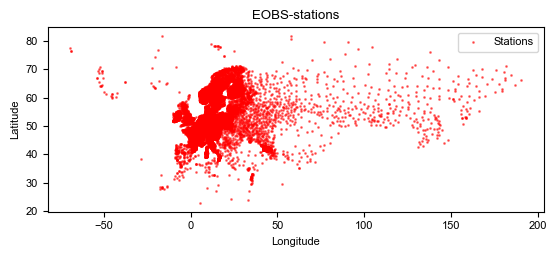

In [30]:
# Just to check:
eobs_stations_geo_df.plot(ax=plt.gca(), marker='o', alpha=0.5, color='red', markersize=1, label='Stations')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('EOBS-stations')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Reproject to projected coordinates system
* We need to reproject our geodataframes to a projected coordinate system (in meters) in order to provide the buffer correctly.

In [31]:
# Here you can check the crs of the datasets:
print("CRS of catchment_boundaries:", catchment_boundaries.crs)
print("CRS of stations:", geo_df.crs)

CRS of catchment_boundaries: epsg:4326
CRS of stations: EPSG:4326


In [ ]:
# Define the target CRS to ETRS89 LAEA (3035)
target_crs = 'EPSG:3035'  

# Reproject the GeoDataFrame to the target CRS
eobs_stations_geo_df_reprojected = eobs_stations_geo_df.to_crs(target_crs)
catchment_boundaries_reprojected = catchment_boundaries.to_crs(target_crs)

## Computation

In [58]:
subset_catchment = catchment_boundaries_reprojected.copy()

In [59]:
# First we make a buffer of 10 km around the catchment shapefiles (this code may take a while to run)
buffer_distance = 10000
buffered_catchment_boundaries_reprojected = subset_catchment.copy()
buffered_catchment_boundaries_reprojected['geometry'] = subset_catchment['geometry'].buffer(buffer_distance)

In [68]:
# First we create an empty dataframe:
num_stations = pd.DataFrame()

# Here we use utils.hydrology.count_geometries_in_polygons function
num_stations["num_prec_stations"] = count_geometries_in_polygons(eobs_stations_geo_df_reprojected, 
                                                                 buffered_catchment_boundaries_reprojected, "basin_id", 
                                                                 new_column="dam_num")

In [69]:
num_stations["area"] = buffered_catchment_boundaries_reprojected.set_index("basin_id", inplace = False).area_calc
num_stations["density"] = num_stations["num_prec_stations"] / num_stations["area"]
num_stations

num_prec_stations      area   density
basin_id                                       
DE00001                32.0  1254.621  0.025506
DE00002                51.0  1794.603  0.028419
DE00003                71.0  2295.630  0.030928
DE00004                16.0   289.199  0.055325
DE00005               120.0  5374.636  0.022327
...                     ...       ...       ...
HU00042                 0.0    25.000  0.000000
HU00043                 1.0  3960.000  0.000253
HU00044                 1.0  1680.000  0.000595
HU00045                 0.0   439.000  0.000000
HU00046                 1.0  1210.000  0.000826

[13811 rows x 3 columns]

In [70]:
num_stations[num_stations.num_prec_stations<1]

num_prec_stations      area  density
basin_id                                      
ITGR017                 0.0    81.405      0.0
ITIS007                 0.0    65.358      0.0
ITIS026                 0.0   337.880      0.0
ITIS029                 0.0   151.804      0.0
ITIS030                 0.0    71.395      0.0
...                     ...       ...      ...
HU00025                 0.0  4330.000      0.0
HU00026                 0.0  3200.000      0.0
HU00030                 0.0   257.000      0.0
HU00042                 0.0    25.000      0.0
HU00045                 0.0   439.000      0.0

[2257 rows x 3 columns]

In [78]:
# Export the analysis:
num_stations.to_csv(PATH_OUTPUT+"/estreams_meteorology_density.csv")

In [71]:
print("The number of catchments with less than 1 gauge inside their catchment area is:", 
      len(num_stations[num_stations.num_prec_stations<1]))

The number of catchments with less than 1 gauge inside their catchment area is: 2257


## Plot:

The World Meteorological Organisation(WMO) recommends a threshold of one station per 575 km2 for the interior plane and undulating areas.

In [72]:
# Calculate the data and set the threshold
data = num_stations.density * 575
threshold = 1

/Users/thiagomedeirosdonascimento/anaconda3/envs/eawag/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


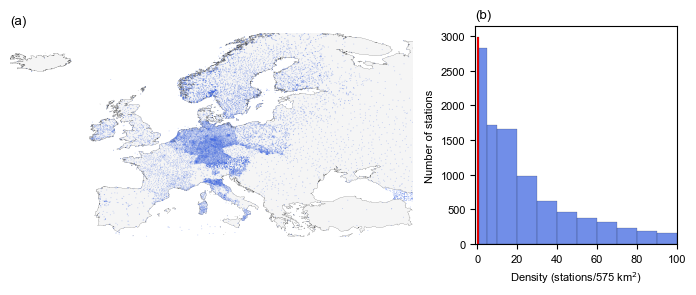

In [75]:
# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

fig, axs = plt.subplots(1, 2, figsize=(7, 3),  gridspec_kw={'width_ratios': [2, 1]})

###1:
# Set the background color to white
axs[0].set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
europe.plot(ax=axs[0], facecolor='whitesmoke', edgecolor='black', linewidth=0.1)
axs[0].set_xlim(-24, 45) 
axs[0].set_ylim(35, 70)  

eobs_stations_geo_df.plot(ax=axs[0], marker='o', alpha=0.3, color='royalblue', markersize=0.5, 
                          label='Stations', edgecolor='none')

axs[0].set_axis_off()  # Turn off both x-axis and y-axis

axs[0].set_aspect('equal')  # Adjust aspect ratio as needed
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)

# Title and (a) label for the first subplot
axs[0].set_title('(a)', loc="left")

# Plotting the histogram
bin_edges = [0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
hist = sns.histplot(data, bins=bin_edges, kde=False, color='royalblue', ax=axs[1])

# Customize the color of the first bar
hist.patches[0].set_fc('red')

axs[1].set_xlim(-1, 100)  # Use set_ylim to set the y-axis limits

# Set labels and title with font size
axs[1].set_xlabel('Density (stations/575 km$^2$)', fontweight='normal')
axs[1].set_ylabel('Number of stations', fontweight='normal')


# Title and (a) label for the first subplot
axs[1].set_title('(b)', loc="left")
# Legend for the second subplot
axs[1].legend(frameon=False)

# Set the figure's background color to 'none'
fig.patch.set_facecolor('none')

plt.rcParams.update({'font.size': 8})  # Change 18 to your desired font size

fig.tight_layout()

# Save or display the plot
#plt.show()
fig.savefig('results/figdensityeobs.png', dpi=300,  bbox_inches='tight')

# Validation of meteorological forcing

## Network information

In [4]:
network_EU = pd.read_excel("data/streamflow/estreams_gauging_stations.xlsx")
network_EU.set_index("new_code", inplace = True)

network_EU

code                 name   river    area  elev        lon  \
new_code                                                                     
AT00001       200014                Bangs   Rhein  4647.9   420   9.534835   
AT00002       200048  Schruns (Vonbunweg)    Litz   102.0   673   9.913677   
AT00003       231662        Loruens-Aeule     Ill   535.2   579   9.847765   
AT00004       200592    Kloesterle (OEBB)  Alfenz    66.6  1014  10.061843   
AT00005       200097  Buers (Bruecke L82)  Alvier    72.2   564   9.802668   
...              ...                  ...     ...     ...   ...        ...   
DE02106   5752400000           Hachelbich  Wipper   524.0   NaN  10.973285   
DE02107   5752500000          Bleicherode    Bode   104.0   NaN  10.592766   
DE02108   5754000000           Sundhausen   Helme   200.6   NaN  10.809725   
DE02109   5755000000           Nordhausen   Zorge   303.6   NaN  10.783833   
DE02110   5756600000               Ilfeld    Bere    62.3   NaN  10.785921   

                lat country degimpact  lake  num_reservoir   RE  remark region  
new_code                                                                        
AT00001   47.273748      AT         s   NaN            NaN  NaN     NaN    NaN  
AT00002   47.080301      AT         l   NaN            NaN  NaN     NaN    NaN  
AT00003   47.132821      AT         s   NaN            NaN  NaN     NaN    NaN  
AT00004   47.128994      AT         s   NaN            NaN  NaN     NaN    NaN  
AT00005   47.150770      AT         s   NaN            NaN  NaN     NaN    NaN  
...             ...     ...       ...   ...            ...  ...     ...    ...  
DE02106   51.347098      DE       NaN   NaN            NaN  NaN     NaN     TH  
DE02107   51.450407      DE       NaN   NaN            NaN  NaN     NaN     TH  
DE02108   51.467735      DE       NaN   NaN            NaN  NaN     NaN     TH  
DE02109   51.506746      DE       NaN   NaN            NaN  NaN     NaN     TH  
DE02110   51.597666      DE       NaN   NaN            NaN  NaN     NaN     TH  

[15046 rows x 14 columns]

In [5]:
# Here we subset only the Swiss data:
network_CH = network_EU[network_EU.country == "CH"]
network_CH

code           name                    river     area elev   lon  \
new_code                                                                     
CH00001   2009  Porte_du_Scex                    Rhône   5239.4  377  6.89   
CH00002   2011           Sion                    Rhône   3372.4  499  7.36   
CH00003   2016          Brugg                     Aare  11681.3  341  8.19   
CH00004   2018      Mellingen                    Reuss   3385.8  349  8.27   
CH00005   2019    Brienzwiler                     Aare    555.2  587  8.09   
...        ...            ...                      ...      ...  ...   ...   
CH00294   6007      Candoglia               Fiume_Toce   1531.4  198  8.42   
CH00295   6008     Gravellona          Torrente_Strona    229.7  211  8.43   
CH00296   6009        Santino  Torrente_San_Bernardino    121.6  254  8.53   
CH00297   6010       Verbania    Torrente_San_Giovanni     60.2  222  8.58   
CH00298   6011        Miorina                   Ticino   6617.3  204  8.65   

            lat country degimpact  lake  num_reservoir   RE  remark region  
new_code                                                                    
CH00001   46.35      CH       NaN   NaN           32.0  NaN     NaN    NaN  
CH00002   46.22      CH       NaN   NaN           20.0  NaN     NaN    NaN  
CH00003   47.48      CH       NaN   NaN           18.0  NaN     NaN    NaN  
CH00004   47.42      CH       NaN   NaN           11.0  NaN     NaN    NaN  
CH00005   46.75      CH       NaN   NaN            7.0  NaN     NaN    NaN  
...         ...     ...       ...   ...            ...  ...     ...    ...  
CH00294   45.97      CH       NaN   NaN            1.0  NaN     NaN    NaN  
CH00295   45.93      CH       NaN   NaN            0.0  NaN     NaN    NaN  
CH00296   45.96      CH       NaN   NaN            0.0  NaN     NaN    NaN  
CH00297   45.94      CH       NaN   NaN            0.0  NaN     NaN    NaN  
CH00298   45.70      CH       NaN   NaN           24.0  NaN     NaN    NaN  

[298 rows x 14 columns]

In [6]:
# Here we subset only the GB data:
network_GB = network_EU[network_EU.country == "GB"]
network_GB

code                      name                     river    area  \
new_code                                                                       
GB00001    10002         Ugie at Inverugie         Ugie at Inverugie  325.72   
GB00002    10003            Ythan at Ellon            Ythan at Ellon  532.29   
GB00003     1001           Wick at Tarroul           Wick at Tarroul  158.18   
GB00004   101002           Medina at Shide           Medina at Shide   30.61   
GB00005   101005  Eastern Yar at Budbridge  Eastern Yar at Budbridge   24.31   
...          ...                       ...                       ...     ...   
GB00667    95001    Inver at Little Assynt    Inver at Little Assynt  138.47   
GB00668    96001    Halladale at Halladale    Halladale at Halladale  193.72   
GB00669    96002          Naver at Apigill          Naver at Apigill  474.01   
GB00670    96004    Strathmore at Allnabad    Strathmore at Allnabad  105.36   
GB00671    97002         Thurso at Halkirk         Thurso at Halkirk  414.48   

          elev   lon    lat country degimpact  lake  num_reservoir   RE  \
new_code                                                                  
GB00001    8.5 -1.83  57.53      GB       NaN   NaN            0.0  NaN   
GB00002    3.8 -2.09  57.36      GB       NaN   NaN            0.0  NaN   
GB00003     13 -3.27  58.48      GB       NaN   NaN            1.0  NaN   
GB00004   10.4 -1.29  50.69      GB       NaN   NaN            0.0  NaN   
GB00005   17.2 -1.25  50.65      GB       NaN   NaN            0.0  NaN   
...        ...   ...    ...     ...       ...   ...            ...  ...   
GB00667   60.3 -5.15  58.17      GB       NaN   NaN            0.0  NaN   
GB00668   23.2 -3.90  58.48      GB       NaN   NaN            0.0  NaN   
GB00669    5.1 -4.21  58.48      GB       NaN   NaN            0.0  NaN   
GB00670   21.9 -4.64  58.35      GB       NaN   NaN            0.0  NaN   
GB00671   30.2 -3.49  58.52      GB       NaN   NaN            2.0  NaN   

          remark region  
new_code                 
GB00001      NaN    NaN  
GB00002      NaN    NaN  
GB00003      NaN    NaN  
GB00004      NaN    NaN  
GB00005      NaN    NaN  
...          ...    ...  
GB00667      NaN    NaN  
GB00668      NaN    NaN  
GB00669      NaN    NaN  
GB00670      NaN    NaN  
GB00671      NaN    NaN  

[671 rows x 14 columns]

## Eobs

In [8]:
timeseries_P_eobs = pd.read_csv("data/meteorology/estreams_meteorology_precipitation.csv", index_col=0)
timeseries_P_eobs.index = pd.to_datetime(timeseries_P_eobs.index)
timeseries_P_eobs.index.name = "dates"
timeseries_P_eobs

AT00001  AT00002  AT00003  AT00004  AT00005  AT00006  AT00007  \
dates                                                                       
1950-01-01     0.00     0.00     0.00      0.0     0.00     0.00     0.00   
1950-01-02    17.16    22.31    20.57     20.7    24.77    23.94    22.48   
1950-01-03    25.71    21.56    22.79     18.8    27.59    23.36    24.06   
1950-01-04    30.63    37.41    35.76     35.8    36.43    38.71    36.85   
1950-01-05     0.07     1.97     1.38      2.7     0.12     1.12     1.08   
...             ...      ...      ...      ...      ...      ...      ...   
2022-12-27     0.05     0.00     0.00      0.0     0.00     0.00     0.00   
2022-12-28     0.00     0.00     0.00      0.0     0.00     0.00     0.00   
2022-12-29     1.64     1.08     0.88      0.9     1.50     1.95     1.22   
2022-12-30     0.54     2.37     1.90      2.4     1.69     2.63     2.03   
2022-12-31     0.00     0.00     0.00      0.0     0.00     0.00     0.00   

            AT00008  AT00009  AT00010  ...  UAGR012  UAGR013  UAGR014  \
dates                                  ...                              
1950-01-01      0.0     0.00     0.00  ...     0.00     0.01     0.01   
1950-01-02     24.0    22.64    23.95  ...     0.44     0.60     0.43   
1950-01-03     27.4    24.41    19.97  ...     1.75     1.61     1.77   
1950-01-04     33.5    36.48    36.50  ...     0.81     1.04     0.78   
1950-01-05      0.0     0.97     0.78  ...     1.04     1.06     1.00   
...             ...      ...      ...  ...      ...      ...      ...   
2022-12-27      0.0     0.00     0.00  ...     4.37     4.38     4.37   
2022-12-28      0.0     0.00     0.00  ...     0.63     0.82     0.63   
2022-12-29      1.5     1.25     3.57  ...     1.09     1.44     1.09   
2022-12-30      1.3     1.95     3.17  ...     1.39     1.84     1.39   
2022-12-31      0.0     0.00     0.00  ...     1.28     1.46     1.28   

            UAGR015  UAGR016  UAGR017  UAGR018  UAGR019  UAGR020  UAGR021  
dates                                                                      
1950-01-01     0.00     0.00     2.79      2.9     3.73     0.01     0.00  
1950-01-02     0.00     0.00     0.00      0.0     0.00     0.00     0.00  
1950-01-03     0.14     1.35     2.86      2.6     2.40     5.19     1.78  
1950-01-04     0.08     0.00     8.54      8.4     8.01     0.00     0.00  
1950-01-05     0.00     0.64     1.47      1.5     2.00     0.00     2.63  
...             ...      ...      ...      ...      ...      ...      ...  
2022-12-27     1.46     2.19      NaN      NaN      NaN      NaN      NaN  
2022-12-28     0.00     0.00      NaN      NaN      NaN      NaN      NaN  
2022-12-29     0.00     0.00      NaN      NaN      NaN      NaN      NaN  
2022-12-30     0.00     0.00      NaN      NaN      NaN      NaN      NaN  
2022-12-31     0.00     0.00      NaN      NaN      NaN      NaN      NaN  

[26663 rows x 15014 columns]

## Camels-CH

In [9]:
# First we can check our files within the folder:
path ='data/meteorology/camelsch'
filenames = glob.glob(path + "/*.csv")
len(filenames)

331

In [12]:
# Now we read the data:
i = 0
timeseries_P_camelsch = pd.DataFrame(index = pd.date_range('01-01-1981','12-31-2022', freq='D'))

#### The tqdm module is useful for checking the progress bar of the loop.
for filename in tqdm.tqdm(filenames):
    # First we read our time-series:
    data = pd.read_csv(filename, encoding='latin-1', engine='python', skiprows = 0, delimiter = ";", usecols = [0, 4])

    # We define new column names:
    names = ['dates', 'P']
    data.columns = names

    # Convert our column of dates to datetime format:
    data["dates"] = pd.to_datetime(data["dates"], format='%Y-%m-%d')

    # Here we can set the index as the dates column:
    data.set_index("dates", inplace = True)

    # First we can retrieve the station name:
    namestation = os.path.basename(filename)
    namestation = namestation.split("_", 5)[4]
    namestation = namestation.replace(".csv", "")
    timeseries_P_camelsch.loc[:, int(namestation)] = data.P

 30%|████████████▌                             | 99/331 [00:02<00:05, 41.47it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
 48%|███████████████████▋                     | 159/331 [00:04<00:04, 34.99it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
 54%|██████████████████████                   | 178/331 [00:04<00:04, 36.55it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: P

 59%|████████████████████████▏                | 195/331 [00:05<00:03, 34.70it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
 71%|█████████████████████████████▏           | 236/331 [00:06<00:02, 35.38it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
 77%|███████████████████████████████▍         | 254/331 [00:07<00:02, 31.35it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
 89%|████████████████████████████████████▎    | 293/331 [00:08<00:01, 30.48it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsch.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1142641129.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

100%|█████████████████████████████████████████| 331/331 [00:09<00:00, 35.23it/s]


In [13]:
timeseries_P_camelsch

2474   4005   2312   3018  4011   3030   3024   2110   2104  \
1981-01-01  0.11   9.24   2.84   8.48  2.92  14.10  12.57   4.71   8.16   
1981-01-02  0.14  14.74   2.89  11.03  5.47  10.72  26.76   8.58   9.69   
1981-01-03  3.40  29.36  10.63  23.07  9.04  33.01  37.75  28.69  36.95   
1981-01-04  2.46  11.88  11.57  20.61  8.85  24.02  20.85  33.34  32.84   
1981-01-05  1.20  12.16   1.92   8.76  3.72  24.56  16.94   6.40  11.20   
...          ...    ...    ...    ...   ...    ...    ...    ...    ...   
2022-12-27   NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN   
2022-12-28   NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN   
2022-12-29   NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN   
2022-12-30   NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN   
2022-12-31   NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN   

             2070  ...   2041   2082   2135   2109   3029   4020  4008   3001  \
1981-01-01   2.88  ...   6.46   2.06   2.57   4.08  13.96  12.23  2.48   5.76   
1981-01-02   5.43  ...   9.43   5.84   8.02  10.82  18.63  22.26  4.26   8.33   
1981-01-03  24.28  ...  23.93  15.52  41.91  47.08  26.21  21.83  9.73  24.11   
1981-01-04  23.35  ...  20.47  14.71  29.87  31.93  22.41  14.64  7.08  19.71   
1981-01-05   6.67  ...   9.63   2.88   5.84   5.26  17.19  13.11  3.92   8.85   
...           ...  ...    ...    ...    ...    ...    ...    ...   ...    ...   
2022-12-27    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
2022-12-28    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
2022-12-29    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
2022-12-30    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
2022-12-31    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN   

             3015   2486  
1981-01-01   3.43   2.47  
1981-01-02  12.73   1.46  
1981-01-03  17.36  28.91  
1981-01-04  23.55  23.48  
1981-01-05   5.48   7.89  
...           ...    ...  
2022-12-27    NaN    NaN  
2022-12-28    NaN    NaN  
2022-12-29    NaN    NaN  
2022-12-30    NaN    NaN  
2022-12-31    NaN    NaN  

[15340 rows x 331 columns]

In [14]:
# Here we subset only data from CH with areas below 100km2:
timeseries_P_eobs_ch = timeseries_P_eobs.loc[:, network_CH[network_CH.area>100].index]
timeseries_P_camelsch_ch = timeseries_P_camelsch.loc[:, network_CH[network_CH.area>100].code.astype(int)]

In [15]:
# We need to change the columns names from Camels to match the EStreams:
# We need to convert the code to int
network_CH.code = network_CH.code.astype(int)

# Now we create  a dictionary with the values:
code_dict = network_CH['code'].to_dict()

# Now we can invert the dictionary:
inverted_code_dict = {v: k for k, v in code_dict.items()}

# Modify column names based on the 'code_dict'
timeseries_P_camelsch_ch.rename(columns=inverted_code_dict, inplace=True)
timeseries_P_camelsch_ch

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/3193394544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_CH.code = network_CH.code.astype(int)


CH00001  CH00002  CH00003  CH00004  CH00005  CH00006  CH00007  \
1981-01-01     1.83     1.49     2.54     4.27     4.37     0.55     1.51   
1981-01-02     6.92     9.43     5.82     8.07    17.89     0.87     8.77   
1981-01-03    38.48    39.50    30.62    26.46    57.15    10.34    40.45   
1981-01-04    23.70    23.50    18.83    31.43    40.59     7.50    23.46   
1981-01-05     4.72     4.23     4.98     6.18    10.73     2.21     4.40   
...             ...      ...      ...      ...      ...      ...      ...   
2022-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            CH00008  CH00009  CH00010  ...  CH00286  CH00287  CH00289  \
1981-01-01     2.60     2.94     6.31  ...     2.34     5.69     0.22   
1981-01-02     5.39     9.12     9.05  ...     1.59     8.13     8.85   
1981-01-03    33.87    47.41    30.36  ...    31.31    45.43    39.99   
1981-01-04    20.93    31.78    27.17  ...    27.16    16.66    26.26   
1981-01-05     5.22     6.51    12.09  ...     2.75     8.01     3.74   
...             ...      ...      ...  ...      ...      ...      ...   
2022-12-27      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2022-12-28      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2022-12-29      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2022-12-30      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2022-12-31      NaN      NaN      NaN  ...      NaN      NaN      NaN   

            CH00290  CH00292  CH00293  CH00294  CH00295  CH00296  CH00298  
1981-01-01     0.27     1.14     1.53     0.98      NaN      NaN     0.35  
1981-01-02     3.87     5.40     7.62     5.61      NaN      NaN     1.13  
1981-01-03    34.89    36.44    36.22    36.66      NaN      NaN    11.01  
1981-01-04    18.07    13.96    19.97    15.51      NaN      NaN     6.92  
1981-01-05     2.87     3.72     6.03     3.65      NaN      NaN     1.62  
...             ...      ...      ...      ...      ...      ...      ...  
2022-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2022-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2022-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2022-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2022-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[15340 rows x 195 columns]

## Camels-GB

In [16]:
# First we can check our files within the folder:
path =r'data/meteorology/camelsgb'
filenames = glob.glob(path + "/*.csv")
len(filenames)

671

In [17]:
i = 0
timeseries_P_camelsgb = pd.DataFrame(index = pd.date_range('10-01-1970','12-31-2015', freq='D'))

#### The tqdm module is useful for checking the progress bar of the loop.
for filename in tqdm.tqdm(filenames):
    # First we read our time-series:
    data = pd.read_csv(filename, encoding='latin-1', engine='python', skiprows = 0, delimiter = ",", usecols = [0, 1])

    # We define new column names:
    names = ['dates', 'P']
    data.columns = names

    # Convert our column of dates to datetime format:
    data["dates"] = pd.to_datetime(data["dates"], format='%Y-%m-%d')

    # Here we can set the index as the dates column:
    data.set_index("dates", inplace = True)

    # First we can retrieve the station name:
    namestation = os.path.basename(filename)
    namestation = namestation.split("_", 5)[4]
    timeseries_P_camelsgb.loc[:, int(namestation)] = data.P

 15%|██████                                   | 100/671 [00:03<00:17, 32.93it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 18%|███████▍                                 | 121/671 [00:04<00:19, 28.27it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 21%|████████▌                                | 141/671 [00:04<00:17, 29.46it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 24%|█████████▊                               | 161/671 [00:05<00:15, 32.65it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

 29%|████████████                             | 197/671 [00:06<00:16, 29.55it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 32%|█████████████▎                           | 218/671 [00:07<00:14, 30.77it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

 38%|███████████████▌                         | 255/671 [00:08<00:13, 30.57it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 41%|████████████████▊                        | 276/671 [00:09<00:12, 30.84it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

 47%|███████████████████▏                     | 313/671 [00:10<00:11, 32.24it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 50%|████████████████████▎                    | 333/671 [00:10<00:11, 30.68it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 53%|█████████████████████▌                   | 353/671 [00:11<00:10, 30.35it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 56%|██████████████████████▊                  | 373/671 [00:12<00:09, 30.47it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

 61%|████████████████████████▉                | 409/671 [00:13<00:08, 30.92it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 64%|██████████████████████████▏              | 429/671 [00:13<00:08, 30.19it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 67%|███████████████████████████▍             | 449/671 [00:14<00:07, 29.42it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

 69%|████████████████████████████▍            | 466/671 [00:15<00:06, 30.90it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 72%|█████████████████████████████▋           | 486/671 [00:15<00:06, 30.76it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 75%|██████████████████████████████▉          | 506/671 [00:16<00:05, 30.93it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

 81%|█████████████████████████████████        | 542/671 [00:17<00:04, 30.94it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 84%|██████████████████████████████████▎      | 562/671 [00:18<00:03, 30.23it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 87%|███████████████████████████████████▌     | 582/671 [00:18<00:02, 30.80it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

 92%|█████████████████████████████████████▊   | 619/671 [00:19<00:01, 31.13it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 95%|███████████████████████████████████████  | 640/671 [00:20<00:00, 31.22it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  timeseries_P_camelsgb.loc[:, int(namestation)] = data.P
 98%|████████████████████████████████████████▎| 660/671 [00:21<00:00, 30.78it/s]/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1485397916.py:22: P

In [18]:
timeseries_P_camelsgb

41004  16001  60010  92001  39010  67005  29009  33039  39006  \
1970-10-01   0.03  17.55   0.91  46.37   0.00   0.59   0.00   0.00   0.04   
1970-10-02   1.04   0.42   3.18   9.36   0.51   7.78   0.06   0.87   1.03   
1970-10-03   0.28   5.54   2.02  31.68   0.02   0.78   3.84   0.04   0.01   
1970-10-04   0.11  13.76   8.47  55.78   0.04   2.84   0.00   0.17   0.06   
1970-10-05   5.65  22.93   4.75  21.87   4.98   1.31   0.83   2.05   1.87   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2015-12-27    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-12-28    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-12-29    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-12-30    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-12-31    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

            37003  ...  33058  85002  28066  21018  38007  58002  28008  \
1970-10-01   0.00  ...   0.00  24.04   0.01  14.10   0.00   0.58   4.88   
1970-10-02   0.22  ...   0.43   1.78   1.73   0.76   0.00   2.23  15.79   
1970-10-03   3.25  ...   0.00   6.25   0.03   2.91   0.54   1.78   3.36   
1970-10-04   0.07  ...   0.07  20.03   0.09   5.67   0.00  11.79   1.15   
1970-10-05   1.98  ...   3.10  15.80   0.84   0.51   2.81  11.62   4.18   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
2015-12-27    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-12-28    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-12-29    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-12-30    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-12-31    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

            56007  71008  46008  
1970-10-01   0.33  12.19   0.44  
1970-10-02   4.56   5.02   0.73  
1970-10-03   0.59  13.43   2.14  
1970-10-04   9.49   6.20   2.38  
1970-10-05   9.83   6.71   6.62  
...           ...    ...    ...  
2015-12-27    NaN    NaN    NaN  
2015-12-28    NaN    NaN    NaN  
2015-12-29    NaN    NaN    NaN  
2015-12-30    NaN    NaN    NaN  
2015-12-31    NaN    NaN    NaN  

[16528 rows x 671 columns]

In [19]:
# Here we subset only data from GB with areas below 100km2:
timeseries_P_eobs_gb = timeseries_P_eobs.loc[:, network_GB[network_GB.area>100].index]
timeseries_P_camelsgb_gb = timeseries_P_camelsgb.loc[:, network_GB[network_GB.area>100].code.astype(int)]

In [20]:
# We need to change the columns names from Camels to match the EStreams:
# We need to convert the code to int
network_GB.code = network_GB.code.astype(int)

# Now we create  a dictionary with the values:
code_dict = network_GB['code'].to_dict()

# Now we can invert the dictionary:
inverted_code_dict = {v: k for k, v in code_dict.items()}

# Modify column names based on the 'code_dict'
timeseries_P_camelsgb_gb.rename(columns=inverted_code_dict, inplace=True)
timeseries_P_camelsgb_gb

/var/folders/_g/v_sd2vds19n_f5ckymsg1h4r0000gn/T/ipykernel_22846/1389019751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_GB.code = network_GB.code.astype(int)


GB00001  GB00002  GB00003  GB00009  GB00010  GB00011  GB00012  \
1970-10-01     4.67     4.20     9.18     5.05     6.26     4.47     7.48   
1970-10-02     1.70     1.65     3.63     1.59     2.10     1.80     1.80   
1970-10-03     4.28     4.14     8.64     6.97     8.61     6.21     8.04   
1970-10-04     2.41     1.66     3.60     1.24     1.05     0.78     2.10   
1970-10-05     0.02     0.00     0.38     0.17     0.41     0.00     5.52   
...             ...      ...      ...      ...      ...      ...      ...   
2015-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2015-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2015-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2015-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2015-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            GB00013  GB00014  GB00015  ...  GB00661  GB00662  GB00664  \
1970-10-01     6.45     6.79     6.21  ...     4.08     6.74    46.37   
1970-10-02     1.54     0.67     1.94  ...     2.22     3.20     9.36   
1970-10-03     7.48     7.36     9.74  ...     6.33     7.47    31.68   
1970-10-04     1.85     1.85     1.44  ...     1.21     1.11    55.78   
1970-10-05     4.23     8.84     2.22  ...     0.00     0.00    21.87   
...             ...      ...      ...  ...      ...      ...      ...   
2015-12-27      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2015-12-28      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2015-12-29      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2015-12-30      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2015-12-31      NaN      NaN      NaN  ...      NaN      NaN      NaN   

            GB00665  GB00666  GB00667  GB00668  GB00669  GB00670  GB00671  
1970-10-01    38.64    25.23    26.80    11.26    18.66    33.82     9.93  
1970-10-02    14.57    11.68    15.74     5.24     8.69    13.80     4.01  
1970-10-03    35.45    27.39    28.44     7.50    13.03    24.84     7.27  
1970-10-04    54.20    36.28    36.26     2.94     8.98    29.95     3.77  
1970-10-05    34.51    30.25    22.08     2.69     6.45    14.28     1.19  
...             ...      ...      ...      ...      ...      ...      ...  
2015-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2015-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2015-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2015-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2015-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[16528 rows x 429 columns]

## Daily mean precipitation

In [34]:
# Switzerland
prec_mean_df_gb = pd.DataFrame(index = timeseries_P_camelsgb_gb.columns)
prec_mean_df_gb["EOBS"] = timeseries_P_camelsgb_gb.loc["1970":"2015", :].mean()
prec_mean_df_gb["Camels"] = timeseries_P_eobs_gb.loc["1970":"2015", :].mean()

In [35]:
# Great Britain
prec_mean_df_ch = pd.DataFrame(index = timeseries_P_camelsch_ch.columns)
prec_mean_df_ch["EOBS"] = timeseries_P_camelsch_ch.loc["1981":"2020", :].mean()
prec_mean_df_ch["Camels"] = timeseries_P_eobs_ch.loc["1981":"2020", :].mean()

In [36]:
# Here we concatenate the two dataframes:
prec_mean_df = pd.concat([prec_mean_df_ch, prec_mean_df_gb], ignore_index=True)


In [37]:
prec_mean_df_gb

EOBS    Camels
GB00001  2.285046  2.065979
GB00002  2.306687  2.103321
GB00003  2.645004  2.268008
GB00009  2.460950  2.269316
GB00010  2.688860  2.464430
...           ...       ...
GB00667  6.203097  4.523534
GB00668  3.063743  2.597564
GB00669  3.811216  3.248485
GB00670  6.918579  3.762267
GB00671  2.970442  2.394028

[429 rows x 2 columns]

In [38]:
prec_mean_df_ch

EOBS    Camels
CH00001  3.574243  3.842886
CH00002  3.424357  3.885155
CH00003  3.657007  3.323751
CH00004  4.365957  3.822901
CH00005  5.092253  4.633859
...           ...       ...
CH00293  4.429854  3.987886
CH00294  4.112237  3.329812
CH00295  4.877813  2.793882
CH00296  5.540921  3.177231
CH00298  4.780131  3.700084

[195 rows x 2 columns]

In [27]:
prec_mean_df

EOBS    Camels
0    2.285046  2.065979
1    2.306687  2.103321
2    2.645004  2.268008
3    2.460950  2.269316
4    2.688860  2.464430
..        ...       ...
619  4.429854  3.987886
620  4.112237  3.329812
621  4.877813  2.793882
622  5.540921  3.177231
623  4.780131  3.700084

[624 rows x 2 columns]

## Correlation analysis

In [28]:
# Calculate the correlation matrix
correlation_matrix = timeseries_P_eobs_gb.corrwith(timeseries_P_camelsgb_gb)

# Create a DataFrame with correlation values
correlation_gb = pd.DataFrame(correlation_matrix, columns=['Correlation'])

correlation_gb = correlation_gb**2
correlation_gb

Correlation
new_code             
GB00001      0.666495
GB00002      0.779090
GB00003      0.762209
GB00009      0.813562
GB00010      0.771880
...               ...
GB00667      0.619091
GB00668      0.578750
GB00669      0.636130
GB00670      0.594551
GB00671      0.671460

[429 rows x 1 columns]

In [29]:
# Calculate the correlation matrix
correlation_matrix = timeseries_P_eobs_ch.corrwith(timeseries_P_camelsch_ch)

# Create a DataFrame with correlation values
correlation_ch = pd.DataFrame(correlation_matrix, columns=['Correlation'])

correlation_ch = correlation_ch**2
correlation_ch

Correlation
new_code             
CH00001      0.880992
CH00002      0.809747
CH00003      0.963618
CH00004      0.952811
CH00005      0.904227
...               ...
CH00293      0.536240
CH00294      0.620400
CH00295      0.693034
CH00296      0.698523
CH00298      0.834547

[195 rows x 1 columns]

In [72]:
(correlation_ch**0.5).mean()

Correlation    0.938579
dtype: float64

In [73]:
(correlation_gb**0.5).mean()

Correlation    0.885098
dtype: float64

In [30]:
# Here we concatenate the two dataframes
correlation_df = pd.concat([correlation_ch, correlation_gb], ignore_index=True)
correlation_df

Correlation
0       0.880992
1       0.809747
2       0.963618
3       0.952811
4       0.904227
..           ...
619     0.619091
620     0.578750
621     0.636130
622     0.594551
623     0.671460

[624 rows x 1 columns]

In [52]:
prec_mean_df.corr()

EOBS    Camels
EOBS    1.000000  0.912733
Camels  0.912733  1.000000

## Plot
* Separated plots for GB and CH

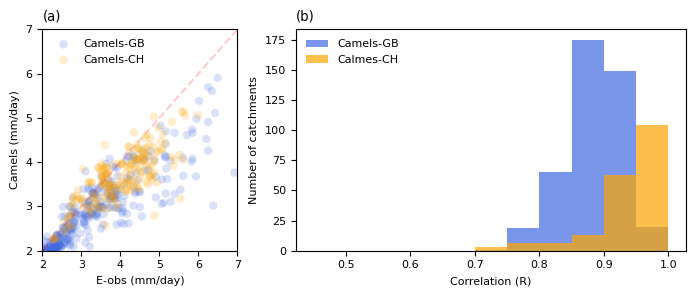

In [67]:
plt.rcParams.update({'font.size': 8})  # Change the 12 to your desired font size

# Example data
data_gb = correlation_gb**0.5
data_ch = correlation_ch**0.5

fig, axs = plt.subplots(1, 2, figsize=(7, 3),  gridspec_kw={'width_ratios': [1, 2]})

# Scatter plot:
x_values_ch = prec_mean_df_ch['EOBS']
y_values_ch = prec_mean_df_ch['Camels']

x_values_gb = prec_mean_df_gb['EOBS']
y_values_gb = prec_mean_df_gb['Camels']

# Add the line of equality in red dashed
axs[0].plot([2, 7], [2, 7], color='red', linestyle='--',  alpha=0.2)

# Create a scatter plot with limits and transparency
sns.scatterplot(x=x_values_gb, y=y_values_gb, color='royalblue', alpha=0.2, ax = axs[0], label='Camels-GB', edgecolor='none')
sns.scatterplot(x=x_values_ch, y=y_values_ch, color='orange', alpha=0.2, ax = axs[0], edgecolor='none', label='Camels-CH')


# Set x and y axis limits
axs[0].set_xlim([2, 7])  # Replace xmin and xmax with your desired limits
axs[0].set_ylim([2, 7])  # Replace ymin and ymax with your desired limits

axs[0].set_ylabel("Camels (mm/day)")
axs[0].set_xlabel("E-obs (mm/day)")


# Create a histogram with custom bin edges
bin_edges = [0.45,0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
sns.histplot(data_gb, bins=bin_edges, kde=False, ax=axs[1], palette=['royalblue'], alpha=.7, label='Camels-GB', linewidth = 0)
sns.histplot(data_ch, bins=bin_edges, kde=False, ax=axs[1], palette=['orange'], alpha=.7, label='Calmes-CH', linewidth = 0)

# Set the labels
axs[1].set_ylabel("Number of catchments")
axs[1].set_xlabel("Correlation (R)")

# Legend for the second subplot
axs[0].legend(frameon=False)
axs[1].legend(frameon=False)

# Title and labels
axs[0].set_title('(a)', loc="left")
axs[1].set_title('(b)', loc="left")

fig.tight_layout()

fig.savefig('results/meteo_forc_val.png', dpi=300,  bbox_inches='tight')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


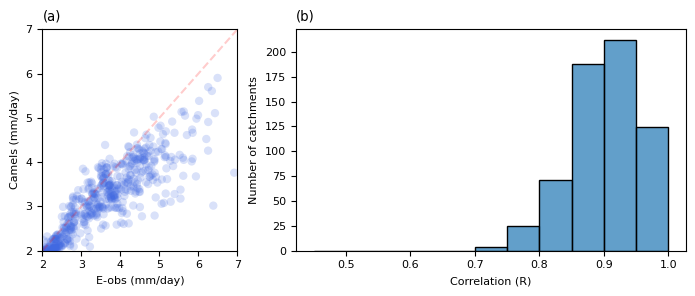

In [40]:
plt.rcParams.update({'font.size': 8})  # Change the 12 to your desired font size

# Example data
data = correlation_df**0.5

fig, axs = plt.subplots(1, 2, figsize=(7, 3),  gridspec_kw={'width_ratios': [1, 2]})

# Scatter plot:
x_values = prec_mean_df['EOBS']
y_values = prec_mean_df['Camels']
# Add the line of equality in red dashed
axs[0].plot([2, 7], [2, 7], color='red', linestyle='--',  alpha=0.2)

# Create a scatter plot with limits and transparency
sns.scatterplot(x=x_values, y=y_values, color='royalblue', alpha=0.2, ax = axs[0], edgecolor='none')

# Set x and y axis limits
axs[0].set_xlim([2, 7])  # Replace xmin and xmax with your desired limits
axs[0].set_ylim([2, 7])  # Replace ymin and ymax with your desired limits

axs[0].set_ylabel("Camels (mm/day)")
axs[0].set_xlabel("E-obs (mm/day)")


# Create a histogram with custom bin edges
bin_edges = [0.45,0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
sns.histplot(data, bins=bin_edges, kde=False, ax=axs[1], color='blue', alpha=.7)

# Set the labels
axs[1].set_ylabel("Number of catchments")
axs[1].set_xlabel("Correlation (R)")

# Legend for the second subplot
axs[1].legend(frameon=False)

# Title and labels
axs[0].set_title('(a)', loc="left")
axs[1].set_title('(b)', loc="left")

fig.tight_layout()

fig.savefig('results/meteo_forc_val_together.png', dpi=300,  bbox_inches='tight')

plt.show()